In [5]:
list1=[3,2,0]

In [7]:
list1 = [i**2 for i in list1]

In [13]:
list1

[9, 4, 0]

In [14]:
list2 = [i+2 for i in list1]

In [16]:
list2

[11, 6, 2]

In [30]:
import pandas as pd
data=pd.read_csv('D:/PGDBA Backup/IIT/DSL/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:

data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

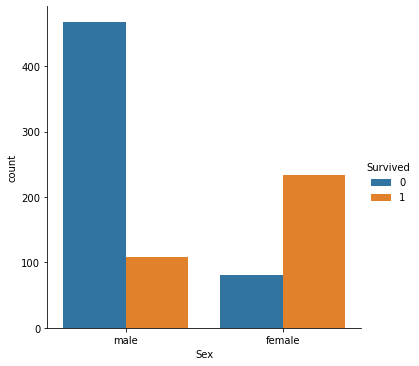

In [32]:
import seaborn as sns 
import matplotlib.pyplot as plt 
  
# Countplot 
sns.catplot(x ="Sex", hue ="Survived",  
kind ="count", data = data) 


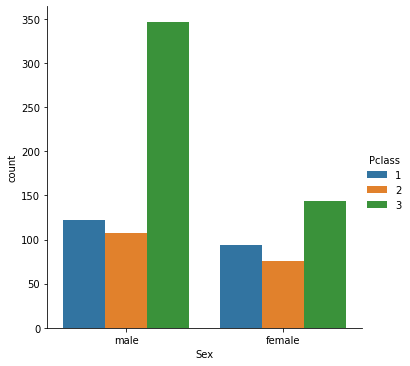

In [33]:
sns.catplot(x ="Sex", hue ="Pclass",  
kind ="count", data = data) 


In [34]:
# Group the dataset by Pclass and Survived and then unstack them 
group = data.groupby(['Pclass', 'Survived']) 
group

In [38]:
pclass_survived = group.size().unstack() 
pclass_survived

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

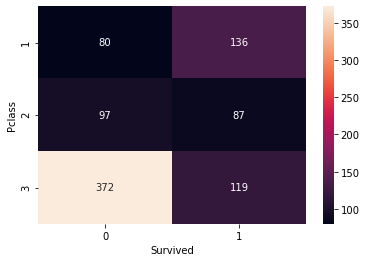

In [41]:
# Heatmap - Color encoded 2D representation of data. 
sns.heatmap(pclass_survived, annot = True, fmt ="d") 


<AxesSubplot:xlabel='Sex', ylabel='Age'>

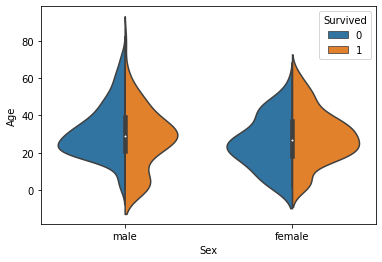

In [46]:
# Violinplot Displays distribution of data  
# across all levels of a category. 
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = data, split = True) 


In [52]:
# violen plot makes the kernel density estimation of distn  so we are getting -ve age value

data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [53]:
# Adding a column Family_Size 
data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp'] 

# Adding a column Alone 
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


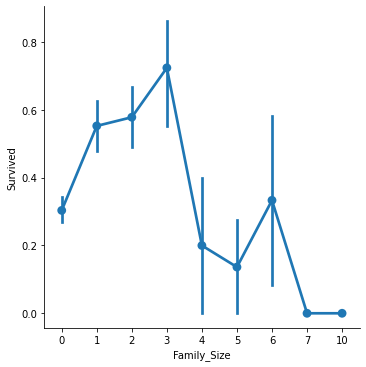

In [55]:
# Family_Size Factorplot  
sns.factorplot(x ='Family_Size', y ='Survived', data = data) 

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


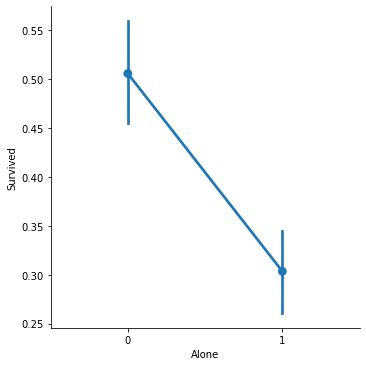

In [56]:
#  "Alone " " creating a factorplot
sns.factorplot(x ='Alone', y ='Survived', data = data)   



<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

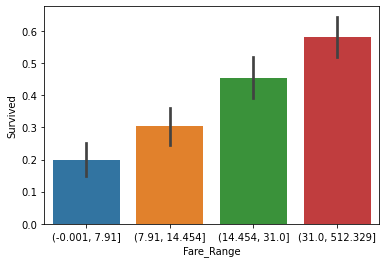

In [59]:
# Divide Fare into 4 bins 
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
# Divide Fare into 4 bins 
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
#   approximate values through 
#  the height of bars: Barplot. 
sns.barplot(x ='Fare_Range', y ='Survived',  
data = data) 


In [87]:
import numpy as np
x = np.array(range(1,100))
y = pd.qcut(x,4, precision=1)
y

[(0.9, 25.5], (0.9, 25.5], (0.9, 25.5], (0.9, 25.5], (0.9, 25.5], ..., (74.5, 99.0], (74.5, 99.0], (74.5, 99.0], (74.5, 99.0], (74.5, 99.0]]
Length: 99
Categories (4, interval[float64]): [(0.9, 25.5] < (25.5, 50.0] < (50.0, 74.5] < (74.5, 99.0]]

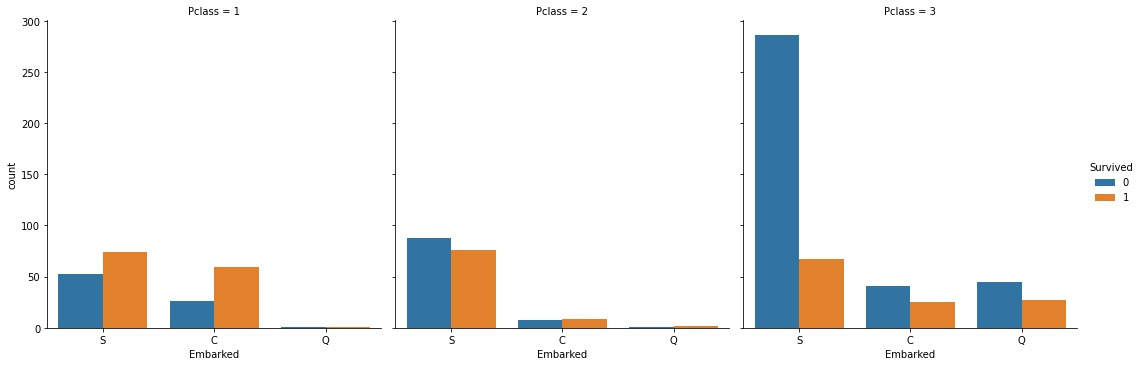

In [88]:
# Countplot 
sns.catplot(x ='Embarked', hue ='Survived',  
kind ='count', col ='Pclass', data = data) 


In [ ]:
---
fig = px.scatter_3d(df, x='Name', y='Sex', z='Age',
                    color='Age')

fig.show()
